<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Optiver_comp_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.0 Dataset Description**
This dataset contains historic data for the daily ten minute closing auction on the NASDAQ stock exchange. Your challenge is to predict the future price movements of stocks relative to the price future price movement of a synthetic index composed of NASDAQ-listed stocks.

This is a forecasting competition using the time series API. The private leaderboard will be determined using real market data gathered after the submission period closes.

#### **Files**
* **[train/test].csv** The auction data. The test data will be delivered by the API.

* **stock_id** - A unique identifier for the stock. Not all stock IDs exist in every time bucket.
* **date_id** - A unique identifier for the date. Date IDs are sequential & consistent across all stocks.
* **imbalance_size** - The amount unmatched at the current reference price (in USD).
* **imbalance_buy_sell_flag** - An indicator reflecting the direction of auction imbalance:
  * buy-side imbalance; 1
  * sell-side imbalance; -1
  * no imbalance; 0
* **reference_price** - The price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price.
* **matched_size** - The amount that can be matched at the current reference price (in USD).
* **far_price** - The crossing price that will maximize the number of shares matched based on auction interest only. This calculation excludes continuous market orders.
* **near_price** - The crossing price that will maximize the number of shares matched based auction and continuous market orders.
* **[bid/ask]_price** - Price of the most competitive buy/sell level in the non-auction book.
* **[bid/ask]_size** - The dollar notional amount on the most competitive buy/sell level in the non-auction book.
* **wap** - The weighted average price in the non-auction book.

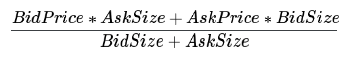

* **seconds_in_bucket** - The number of seconds elapsed since the beginning of the day's closing auction, always starting from 0.
* **target** - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index. Only provided for the train set.
 * The synthetic index is a custom weighted index of Nasdaq-listed stocks constructed by Optiver for this competition.
 * The unit of the target is basis points, which is a common unit of measurement in financial markets. A 1 basis point price move is equivalent to a 0.01% price move.
 * Where t is the time at the current observation, we can define the target:

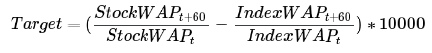

All size related columns are in USD terms.

**All price related columns are converted to a price move relative to the stock wap (weighted average price) at the beginning of the auction period.**

* **sample_submission**: A valid sample submission, delivered by the API. See this [notebook](https://www.kaggle.com/code/sohier/optiver-2023-basic-submission-demo) for a very simple example of how to use the sample submission.

* **revealed_targets** The first time_id for each date in this file provides the true target values for the entire previous date. All other rows contain mostly null values.

* **public_timeseries_testing_util.py**: An optional file intended to make it easier to run custom offline API tests. See the script's docstring for details.

* **example_test_files** Data intended to illustrate how the API functions. Includes the same files and columns delivered by the API.

* **optiver2023** Files that enable the API. Expect the API to deliver all rows in under five minutes and to reserve less than 0.5 GB of memory.

#### **Relevant Files**

* [Starter Pack v1](https://www.kaggle.com/code/mmmarchetti/the-most-simple-and-dumbest-starter-s-notebook)
* [Discussion](https://www.kaggle.com/competitions/optiver-trading-at-the-close/discussion)
* [Starter Pack v1](https://www.kaggle.com/code/iqbalsyahakbar/optiver-a-starter-s-notebook/notebook)  
* [Discord Chat](https://discord.com/channels/1101210829807956100/onboarding)

### 1.1 Install Packages:

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
!pip install MiniSom

### **1.2 Packages**

In [2]:
#from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
#from pytorch_forecasting.data import GroupNormalizer
#from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
#from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

#import pytorch_lightning as pl
#from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
#from pytorch_lightning.loggers import TensorBoardLogger
#import torch

In [3]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 9.894774675369263 sec


<Figure size 640x480 with 0 Axes>

In [4]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.14.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.1


### **1.3 Utility Functions**

In [5]:
def plot_data(a_,b_,df_):
  fig, axs = plt.subplots(1,3,figsize=(14,4))
  df=df_.copy()
  a=a_
  b=b_
  axs[0].plot(df[a])
  axs[0].set_title(a,fontsize=10)
  axs[1].plot(df[b])
  axs[1].set_title(b,fontsize=10)
  axs[2].scatter(df["target"],(df[a].div(df[b]))**2)
  axs[2].set_title("Scatter {} vs {}".format(a,b),fontsize=10);
  plt.show()

def find_parameters(df):

  X_ = df[(df["far_price"]>=0.5)|(df["far_price"]<=1.5)]["near_price"].values.reshape(-1,1)
  y_ = df[(df["far_price"]>=0.5)|(df["far_price"]<=1.5)]["far_price"].values.reshape(-1,1)
  print(X_.shape,y_.shape)
  lr = LinearRegression()

  lr.fit(X=X_,y=y_)
  print("Coeff: {}\nIntercept: {}".format(lr.coef_[0][0], lr.intercept_[0]))

  return lr.intercept_[0], lr.coef_[0][0]

def replace_farprice(df_, intercept, beta):
  df  = df_.copy()
  arr_0 = df[(df["far_price"]>1.5)|(df["far_price"]<0.5)]["far_price"].values
  arr_1 = df[(df["far_price"]>1.5)|(df["far_price"]<0.5)]["near_price"].values

  arr_1 = intercept + beta*arr_1

  df["far_price"].replace(arr_0, arr_1, inplace=True)

  arr_2_ind = df[(df["far_price"].isna()==True)&(df["near_price"].isna()==False)].index

  arr_2 = intercept + beta*df.loc[arr_2_ind,"near_price"]

  df.loc[arr_2_ind,"far_price"] = arr_2

  df["check_near_far"] = df["near_price"].div(df["far_price"])

  return df

def train_col_def(df):

  train_col = list(df.columns)
  aggregator = ["stock_id","time_id","date_id"]
  for ag in aggregator:
    train_col.remove(ag)

  return train_col

def fill_nan_df(df):

  df_ = df.copy()
  print("Dataset Original Shape: {}".format(df_.shape))
  # Replace extreme Values in near and far prices:
  #alpha, beta = find_parameters(df_)
  beta= 2.2491285714921436
  alpha= -1.2465923656098574

  df_ = replace_farprice(df_, intercept=alpha, beta=beta)

#  values = {"far_price": df_.loc[:,"far_price"].median(), "near_price": df_.loc[:,"near_price"].median()}
#  df_.fillna(value=values,inplace=True)

  # Replace NaN for Far+price and Near_Price with reference Price values
  df_['far_price'] = df_['far_price'].fillna(df_['reference_price'])
  df_['near_price'] = df_['near_price'].fillna(df_['reference_price'])

  df_['far_price'] = df_['far_price'].interpolate(limit=1, limit_direction="forward")
  df_['near_price'] = df_['near_price'].interpolate(limit=1, limit_direction="forward")

  df_["check_near_far"] = df_["near_price"].div(df_["far_price"])


  list_cols_fill = ["imbalance_size","imbalance_buy_sell_flag","wap","reference_price","matched_size","bid_price","ask_price","check_near_far"]

  for data in list_cols_fill:
      train_col = train_col_def(df_)
      df_reshaped = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
      df_reshaped.loc[:,data].fillna(method="ffill",axis=0,inplace=True)
      df_ = df_reshaped.stack(level=1).reset_index().dropna(axis=0, thresh=11)

  # Add features for company size based on volumes:
  df_ = comp_size(df_)

  ##### add features transformer here #####
  feature_list = ["ask_size","bid_size","imbalance_size","matched_size"]
  transformer = FunctionTransformer(lambda x: np.log(x + 1))
  df_[feature_list] = transformer.transform(df_[feature_list])

  # Create additional Features: "imbalance_size_sign"
  df_["imbalance_size_sign"] = df_["imbalance_size"].multiply(df_["imbalance_buy_sell_flag"])
  # Create additional Features:
  df_["imbalance_size_sign_delta"] = 0
  train_col = train_col_def(df_)
  df_reshaped = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
  df_reshaped["imbalance_size_sign_delta"] = df_reshaped["imbalance_size_sign"].diff()
  df_reshaped["imbalance_size_sign_delta"].fillna(method="ffill",inplace=True)
  df_reshaped["imbalance_size_sign_delta"][df_reshaped[("seconds_in_bucket",0)]==0] = 0
  #Reshape in the Original Format:
  new_df_ = df_reshaped.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  new_df_.reset_index(inplace=True, drop=True)
  print("Dataset Final Shape: {}".format(new_df_.shape))

  return new_df_

def get_rsi(close, lookback):
    ret = close.diff()

    up = ret.apply(lambda x: x if x > 0 else 0)
    down = ret.apply(lambda x: -x if x < 0 else 0)

    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    #rsi_df = rsi_df.dropna()
    return rsi_df#[3:]

### CREATE NEW FEATURES ###
def create_new_features(df):
  df_=df.copy()
  train_col = train_col_def(df_)
  try:
    train_col.remove("dispersion")
  except:
    pass
  df_resh_ = df_.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")
  # Add return dispersion
  df_resh_["dispersion"] = df_resh_["wap"].std(axis=1)
  daily_dispersion=df_resh_.groupby(["time_id"])["dispersion"].agg("mean")
  df_resh_.drop("dispersion",axis=1,inplace=True)
  # Add Equally Weighted Index
  df_resh_["eq_wgt_index"] = df_resh_["wap"].mean(axis=1)
  daily_eq_wgt=df_resh_.groupby(["time_id"])["eq_wgt_index"].agg("mean")
  df_resh_.drop("eq_wgt_index",axis=1,inplace=True)

  # Reshape and add new features
  new_df = df_resh_.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)
  new_df = pd.merge(left=new_df, right=daily_dispersion, left_on="time_id", right_on="time_id")
  new_df = pd.merge(left=new_df, right=daily_eq_wgt, left_on="time_id", right_on="time_id")

  # Add bid-ask spread
  new_df["bid_ask_spread"] = new_df["ask_price"]-new_df["bid_price"]

  # Add bid-ask_size_spread
  new_df["bid_ask_size_spread"] = new_df["ask_size"]-new_df["bid_size"]

  train_col = train_col_def(new_df)
  df_resh_ = new_df.groupby(["stock_id","time_id","date_id"])[train_col].agg("first").unstack("stock_id")

  #df_resh_["dispersion"] = df_resh_["dispersion"].shift(55)
  df_resh_["dispersion"].fillna(df_resh_["dispersion"].median(),inplace=True)

  #reshape to original shape
  new_df = df_resh_.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)

  return df_resh_ , new_df

%time
def add_level_prices(df_resh_exp,df_exp):

    test_ts = df_resh_exp.copy()
    to_merge = test_ts.loc[:,["wap"]]
    to_merge_price = test_ts.loc[:,["wap"]]

    #display(to_merge_price.head(3))

    to_merge.rename({"wap":"rsi"},axis=1,inplace=True)
    to_merge_price.rename({"wap":"cum_price"},axis=1,inplace=True)

    #display(to_merge_price.head(3))

    to_merge.fillna(0,inplace=True)
    to_merge_price.fillna(1,inplace=True)

    #display(to_merge_price.head(3))

    to_merge_price = to_merge_price.cumprod()

    # Moving Average Features:
    to_merge_ma = to_merge_price.rolling(20,min_periods=1).mean()
    to_merge_ma = to_merge_price.div(to_merge_ma).subtract(1)
    to_merge_ma.fillna(0, inplace=True)
    to_merge_ma.rename({"cum_price":"mov_average_st"},axis=1,inplace=True)

    to_merge_ma_lt = to_merge_price.rolling(60,min_periods=1).mean()
    to_merge_ma_lt = to_merge_price.div(to_merge_ma_lt).subtract(1)
    to_merge_ma_lt.fillna(0, inplace=True)
    to_merge_ma_lt.rename({"cum_price":"mov_average_lt"},axis=1,inplace=True)

    #display(to_merge_price.head(3))

    for i_ in tqdm(range(200)):
      rsi = get_rsi(to_merge_price.loc[:,("cum_price",i_)], 14)
      to_merge.loc[:,("rsi",i_)] = rsi
      gc.collect()

    to_merge.fillna(method="ffill",inplace=True)
    to_merge.fillna(method="bfill",inplace=True)

    mask = test_ts.loc[:,["wap"]].isna()==False
    mask.astype("float").replace({0:np.nan},inplace=True)
    to_merge = to_merge*mask.values

    # Add new series to old df:
    test_ts = pd.merge(left=test_ts, right=to_merge, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_price, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_ma, left_on="time_id", right_on="time_id")
    test_ts = pd.merge(left=test_ts, right=to_merge_ma_lt, left_on="time_id", right_on="time_id")
    gc.collect()

    #reshape to original shape
    test_ts = test_ts.stack(level=1).reset_index(drop=False).dropna(axis=0, thresh=10)
    #new_long_df = pd.merge(left=new_long_df,right=df_exp[["date_id","time_id"]],left_on="time_id", right_on="time_id")
    test_ts["date_id"] = df_exp["date_id"]
    gc.collect()

    return test_ts

##### New Functions ####

def add_volume_cluster(df_input):
  current_directory = os.getcwd()

  os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

  with open('replace_cluster_dict.pickle', 'rb') as handle:
      replace_cluster_dict = pickle.load(handle)

  with open('replace_correlationcluster_dict.pickle', 'rb') as handle:
      replace_correlationcluster_dict = pickle.load(handle)

  os.chdir(current_directory)


  df = df_input.copy()

  df["vol_cluster"] = df["stock_id"]
  df["vol_cluster"].replace(replace_cluster_dict, inplace=True)

  df["corr_cluster"] = df["stock_id"]
  df["corr_cluster"].replace(replace_correlationcluster_dict, inplace=True)

  return df

def add_relative_perf(df_input):
  df = df_input.copy()

  df["rel_perf"] = (df["wap"]).div(df["eq_wgt_index"])

  return df

def comp_size(train):

  volumes_df = train.groupby(["stock_id","date_id"])[["matched_size"]].agg("sum").unstack(["stock_id"])
  mean_vols = volumes_df.mean(axis=0)

  df=mean_vols.copy()
  size={}

  for i_ in tqdm(df["matched_size"].index):
    if df["matched_size"][i_]>=1_000_000_000:
      size[i_] = 2
    elif df["matched_size"][i_]<1_000_000_000 and df["matched_size"][i_]>500_000_000:
      size[i_] = 1
    else:
      size[i_] = 0

  train["vol_bucket"]=train["stock_id"].replace(size)

  return train

def imbalance_features(df_):

  df=df_.copy()

  # Volume Imbalaces:
  df["imbalance_buy_sell_flag"] = df["imbalance_buy_sell_flag"].replace({-1:0,0:1,1:2})
  df['imbalance1'] = (df['bid_size'] - df['ask_size']) / (df['bid_size'] + df['ask_size'])
  df['imbalance2'] = (df['imbalance_size'] - df['matched_size']) / (df['matched_size'] + df['imbalance_size'])+1
  df['imbalance_ratio'] = df['imbalance_size'] / df['matched_size']
  # Vol_prices imbalances:
  df["volume"] = df['bid_size'] + df['ask_size']
  df["ask_priceXsize"] = df["ask_price"] * df["ask_size"]
  df["bid_priceXsize"] = df["bid_price"] * df["bid_size"]
  df["bidask_priceXsize"] = df["bid_priceXsize"].div(df["ask_priceXsize"])
  # Prices imbalances:
  prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']

  df.drop(labels="bid_ask_spread", inplace=True, axis=1)

  for i, price_a in enumerate(prices):
      for j, price_b in enumerate(prices):
          if i > j:
              df[f'{price_a}-{price_b}'] = (df[price_a] - df[price_b]).astype(np.float32)
              df[f'{price_a}*{price_b}'] = (df[price_a] * df[price_b]).astype(np.float32)
              imbalance_column_name = f'imbalance_{price_a}_{price_b}'
              df[imbalance_column_name] = (df[price_a] - df[price_b]) / (df[price_a] + df[price_b])

  df.drop(labels=["wap-ask_price","wap-reference_price","imbalance_wap_bid_price","ask_price*reference_price",
                  "bid_price*reference_price","bid_price*ask_price","wap*reference_price","wap*ask_price",
                  "wap*bid_price","bid_price-reference_price","imbalance_ask_price_reference_price","bid_priceXsize",
                  "far_price*reference_price","ask_price*far_price","bid_price*far_price","wap*far_price","imbalance_near_price_reference_price",
                  "wap-near_price","near_price-reference_price","imbalance_bid_price_near_price","imbalance_ask_price_near_price","bid_price-near_price","ask_price-near_price",
                  "bid_price*near_price","ask_price*near_price","near_price*reference_price","ask_price-far_price","bid_price-far_price","imbalance_ask_price_far_price",
                  "wap-far_price","imbalance_bid_price_far_price","far_price-reference_price","imbalance_far_price_reference_price","near_price*far_price","imbalance_wap_far_price",
                  "imbalance_size","bid_price-ask_price"],
          inplace=True,
          axis=1)

  ##### transformadditional features #####

  #["dispersion","bidask_priceXsize","wap-bid_price","imbalance_wap_ask_price","imbalance_bid_price_ask_price"]

  df["dispersion"] = np.log(df["dispersion"]*1000+1.0)
  df["bidask_priceXsize"] = np.log(df["bidask_priceXsize"])

  transformer = FunctionTransformer(lambda x: np.power( x, 0.25))
  df["wap-bid_price"] = transformer.transform(df["wap-bid_price"])

  transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(0.000001-x)))
  df["imbalance_wap_ask_price"] = transformer.transform(df["imbalance_wap_ask_price"])

  transformer = FunctionTransformer(lambda x: np.log(np.reciprocal(-x)))
  df["imbalance_bid_price_ask_price"] = transformer.transform(df["imbalance_bid_price_ask_price"])

  # Add squared values for ask_size and bid_size
  #volume_feature = ['ask_size','bid_size']
  #df_volume_ = df[volume_feature].copy()

  #current_directory = os.getcwd()

  #os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

  #with open('bid_ask_scaler.pickle', 'rb') as handle:
  #    scaler = pickle.load(handle)

  #os.chdir(current_directory)


  #df_volume = scaler.transform(df_volume_)
  #df_volume = pd.DataFrame(data=df_volume, columns=['ask_size_sq','bid_size_sq'])

  #df_volume = df_volume**2
  #df_volume = np.log(df_volume)

  #df = pd.concat([df,df_volume], axis=1)

  return df

def agg_features_creation(df):
  train_ext = add_volume_cluster(df)
  #train_ext = comp_size(train_ext)
  train_ext = imbalance_features(train_ext)
  return train_ext

def add_price_lags(df_,n_lags=20):
  df = df_.copy()
  cols=["date_id","time_id","stock_id"]
  cols_rsi=["date_id","time_id","stock_id"]
  cum_price_for_lags = df.groupby(["date_id","time_id","stock_id"])[["cum_price"]].first().unstack("stock_id")
  rsi_for_lags = df.groupby(["date_id","time_id","stock_id"])[["rsi"]].first().unstack("stock_id")
  all_temp = []
  all_temp_rsi = []

  gc.collect()

  for i in tqdm(range(1,n_lags)):

    temp = pd.DataFrame(index=cum_price_for_lags.index,columns=cum_price_for_lags.columns,data=cum_price_for_lags.shift(i).fillna(method="bfill",limit=i).values).rename({"cum_price":"cum_price_dlag{}".format(i)},axis=1)
    all_temp.append(temp)
    cols.append("cum_price_dlag{}".format(i))

    temp_rsi = pd.DataFrame(index=cum_price_for_lags.index,columns=rsi_for_lags.columns,data=rsi_for_lags.shift(i).fillna(method="bfill",limit=i).values).rename({"rsi":"rsi_dlag{}".format(i)},axis=1)
    all_temp_rsi.append(temp_rsi)
    cols_rsi.append("rsi_dlag{}".format(i))
    gc.collect()

  flag_merged = pd.concat(all_temp, axis=1)
  flag_merged = flag_merged.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  flag_merged = flag_merged.loc[:,cols]
  flag_merged = pd.merge(left=df, right=flag_merged, how="left", left_on=["date_id",	"time_id",	"stock_id"], right_on=["date_id",	"time_id",	"stock_id"], )

  rsi_merged = pd.concat(all_temp_rsi, axis=1)
  rsi_merged = rsi_merged.stack(level=1).reset_index().dropna(axis=0, thresh=10)
  rsi_merged = rsi_merged.loc[:,cols_rsi]
  rsi_merged = pd.merge(left=flag_merged, right=rsi_merged, how="left", left_on=["date_id",	"time_id",	"stock_id"], right_on=["date_id",	"time_id",	"stock_id"], )

  rsi_merged.rename({"cum_price":"cum_price_dlag0","rsi":"rsi_dlag0"}, axis=1,inplace=True)

  current_directory = os.getcwd()
  # TREE BASED FEATURES
  os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")
  estimator_v0 = joblib.load("tree_feature_model_v0.joblib")
  estimator_v1 = joblib.load("tree_feature_model_v1.joblib")
  estimator_v2 = joblib.load("tree_feature_model_v2.joblib")
  os.chdir(current_directory)

  tree_features_v0 = ['imbalance_wap_reference_price', 'imbalance_size_sign_delta', 'rsi_dlag0','bid_ask_size_spread']
  tree_features_v1 = ['imbalance_size_sign', 'matched_size', 'ask_size','bid_size','bid_ask_size_spread']
  tree_features_v2 = ['mov_average_st', 'mov_average_lt', 'bid_ask_size_spread','imbalance_wap_reference_price','rsi_dlag0']

  rsi_merged["tree_feat_v0"] = estimator_v0.predict(rsi_merged[tree_features_v0])
  rsi_merged["tree_feat_v1"] = estimator_v1.predict(rsi_merged[tree_features_v1])
  rsi_merged["tree_feat_v2"] = estimator_v2.predict(rsi_merged[tree_features_v2])

  # NN BASED FEATURES
  os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

  with open('encoder_scaler.pickle', 'rb') as handle:
      enc_scaler = pickle.load(handle)

  os.chdir(folders_nn)
  model = keras.models.load_model('enc/encoder')
  os.chdir(current_directory)

  tabular_features = ['ask_price', 'ask_size','bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
       'dispersion', 'eq_wgt_index', 'far_price','imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
       'near_price', 'reference_price', 'target', 'wap', 'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
       'bidask_priceXsize', 'near_price-far_price','imbalance_near_price_far_price', 'ask_price-reference_price',
       'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price','imbalance_wap_reference_price',
       'wap*near_price', 'mov_average_lt','mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
       'wap-bid_price', 'tree_feat_v0']

  tabular_features.remove("target")
  train_encoding = rsi_merged[tabular_features].copy()
  train_encoding = enc_scaler.transform(train_encoding)

  enc_features = model.predict(train_encoding,batch_size=1024)

  enc_df = pd.DataFrame(data=enc_features,columns=["enc_0","enc_1","enc_2"])

  rsi_merged[["enc_0","enc_1","enc_2"]]=enc_df

  col_right_order = ['time_id', 'stock_id', 'date_id', 'ask_price', 'ask_size', 'bid_ask_size_spread',
                      'bid_price', 'bid_size', 'check_near_far', 'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
                      'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
                      'near_price', 'reference_price', 'seconds_in_bucket',
                      'target', 'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster',
                      'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume',
                      'ask_priceXsize', 'bidask_priceXsize', 'near_price-far_price',
                      'imbalance_near_price_far_price', 'ask_price-reference_price',
                      'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
                      'imbalance_wap_reference_price', 'wap*near_price','mov_average_lt','mov_average_st',
                      'imbalance_wap_near_price', 'imbalance_wap_ask_price', 'wap-bid_price', "enc_0","enc_1","enc_2", 'tree_feat_v0','tree_feat_v1',"tree_feat_v2",
                      'cum_price_dlag0','cum_price_dlag1', 'cum_price_dlag2', 'cum_price_dlag3',
                      'cum_price_dlag4', 'cum_price_dlag5', 'cum_price_dlag6',
                      'cum_price_dlag7', 'cum_price_dlag8', 'cum_price_dlag9',
                      'cum_price_dlag10', 'cum_price_dlag11', 'cum_price_dlag12',
                      'cum_price_dlag13', 'cum_price_dlag14', 'cum_price_dlag15',
                      'cum_price_dlag16', 'cum_price_dlag17', 'cum_price_dlag18',
                      'cum_price_dlag19', 'rsi_dlag0', 'rsi_dlag1', 'rsi_dlag2', 'rsi_dlag3', 'rsi_dlag4',
                      'rsi_dlag5', 'rsi_dlag6', 'rsi_dlag7', 'rsi_dlag8', 'rsi_dlag9',
                      'rsi_dlag10', 'rsi_dlag11', 'rsi_dlag12', 'rsi_dlag13', 'rsi_dlag14',
                      'rsi_dlag15', 'rsi_dlag16', 'rsi_dlag17', 'rsi_dlag18', 'rsi_dlag19']

  rsi_merged = rsi_merged[col_right_order]


  return rsi_merged


########################### AGGREGATE ################################
def all_features_creation(df_):
  df=df_.copy()

  df = fill_nan_df(df)
  gc.collect()
  print("Step I: {}".format(df.shape))
  df_resh_exp, df = create_new_features(df)
  gc.collect()
  print("Step II: {}".format(df.shape))
  df = add_level_prices(df_resh_exp,df)
  gc.collect()
  print("Step III: {}".format(df.shape))
  df = agg_features_creation(df)
  gc.collect()
  print("Step IV: {}".format(df.shape))
  df = add_price_lags(df,n_lags=20)
  gc.collect()
  print("Step V: {}".format(df.shape))

  return df

#########################################################

def create_train_test(train,test):
  train_df = train.copy()
  test_df = test.copy()

  test_df["target"]=1.0

  test_ids = test_df.row_id.unique()
  train_ids = train_df.row_id.unique()

  join_train_test = pd.concat([train_df, test_df], axis=0, join="outer").drop_duplicates(subset="row_id")
  join_train_test.drop("row_id",axis=1,inplace=True)
  join_train_test_exp = all_features_creation(join_train_test)

  join_train_test_exp["row_id"] = join_train_test_exp["date_id"].astype(str)+"_"+join_train_test_exp["seconds_in_bucket"].astype(int).astype(str)+"_"+join_train_test_exp["stock_id"].astype(str)
  join_train_test["row_id"] = join_train_test["date_id"].astype(str)+"_"+join_train_test["seconds_in_bucket"].astype(int).astype(str)+"_"+join_train_test["stock_id"].astype(str)

  train_df = join_train_test
  test_df = join_train_test_exp[join_train_test_exp.row_id.isin(test_ids)].drop("target",axis=1)

  return train_df, test_df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [6]:
def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

### **2.1 Connect Drives**

Verify System:

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [8]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

Connect to Google Drive:

In [9]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
folder_data = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Data/"
models_folders = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models"
folders_nn = "/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/neural_networks/"

list_directories = [folder_data,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/kaggle/Optiver_comp_2023/Data/ already exists
/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models already exists
/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/neural_networks/ already exists


## 2.0 Create Datasets

This Files contains the Functions to create the final version of the dataset starting from the original data provided.

In [11]:
#train = pd.read_csv(r'train.csv',
                    #dtype={"date_id":"str","stock_id":"int","seconds_in_bucket":"int"}
#                    )#.drop('row_id', axis = 1)
#train = train.dropna(axis=0, subset=["target"])
revealed_targets = pd.read_csv("example_test_files/revealed_targets.csv", dtype={"revealed_date_id":"str","stock_id":"str"})
test = pd.read_csv("example_test_files/test.csv",dtype={"date_id":"int","stock_id":"int","seconds_in_bucket":"int"})

In [12]:
#train, test_exp = create_train_test(train,test)

In [13]:
#train.shape, test_exp.shape

#test_ids = test.row_id.unique()
#test_ids

#train[train.row_id.isin(test_ids)].drop("target",axis=1)
#test_exp

In [14]:
gc.collect()

159

### 2.2 Reload Extended Data:

In [15]:
dict_cat = {cl:"int32" for cl in ['time_id', 'stock_id', 'date_id', 'vol_cluster', 'corr_cluster',"vol_bucket", "seconds_in_bucket","imbalance_buy_sell_flag"]}

float_cols =  ['ask_price', 'ask_size', 'bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far', 'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size', 'near_price', 'reference_price', 'target', 'wap', 'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume',
               'ask_priceXsize', 'bidask_priceXsize', 'near_price-far_price', 'imbalance_near_price_far_price', 'ask_price-reference_price', 'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price', 'imbalance_wap_reference_price', 'wap*near_price', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
                'wap-bid_price', "mov_average_st", "mov_average_lt", "enc_0","enc_1","enc_2", 'tree_feat_v0','tree_feat_v1', 'tree_feat_v2', 'cum_price_dlag0','cum_price_dlag1', 'cum_price_dlag2', 'cum_price_dlag3', 'cum_price_dlag4', 'cum_price_dlag5', 'cum_price_dlag6', 'cum_price_dlag7', 'cum_price_dlag8', 'cum_price_dlag9', 'cum_price_dlag10', 'cum_price_dlag11', 'cum_price_dlag12', 'cum_price_dlag13', 'cum_price_dlag14',
                'cum_price_dlag15', 'cum_price_dlag16', 'cum_price_dlag17', 'cum_price_dlag18', 'cum_price_dlag19', 'rsi_dlag0', 'rsi_dlag1', 'rsi_dlag2', 'rsi_dlag3', 'rsi_dlag4', 'rsi_dlag5', 'rsi_dlag6', 'rsi_dlag7', 'rsi_dlag8', 'rsi_dlag9', 'rsi_dlag10', 'rsi_dlag11', 'rsi_dlag12', 'rsi_dlag13', 'rsi_dlag14', 'rsi_dlag15', 'rsi_dlag16', 'rsi_dlag17', 'rsi_dlag18', 'rsi_dlag19']

dict_float = {cl:"float32" for cl in float_cols}

datatype_dict = {**dict_cat, **dict_float}

In [16]:
%%time
train=pd.read_csv("train_extended.csv", dtype = datatype_dict)
train.head(3)

CPU times: user 1min 54s, sys: 7.87 s, total: 2min 2s
Wall time: 2min 42s


,time_id,stock_id,date_id,ask_price,ask_size,bid_ask_size_spread,bid_price,bid_size,check_near_far,dispersion,...,rsi_dlag10,rsi_dlag11,rsi_dlag12,rsi_dlag13,rsi_dlag14,rsi_dlag15,rsi_dlag16,rsi_dlag17,rsi_dlag18,rsi_dlag19
0,0,0,0,1.000026,9.047119,-1.965797,0.999812,11.012917,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1.000660,9.933342,1.851855,0.999896,8.081488,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,0,1.000298,9.851984,-0.692226,0.999403,10.544209,1.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [17]:
cat_cols = [c for c in train.columns if train[c].dtypes=="int32"]
float_cols = [c for c in train.columns if train[c].dtypes=="float32"]

In [18]:
train.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237892 entries, 0 to 5237891
Data columns (total 88 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   time_id                              int32  
 1   stock_id                             int32  
 2   date_id                              int32  
 3   ask_price                            float32
 4   ask_size                             float32
 5   bid_ask_size_spread                  float32
 6   bid_price                            float32
 7   bid_size                             float32
 8   check_near_far                       float32
 9   dispersion                           float32
 10  eq_wgt_index                         float32
 11  far_price                            float32
 12  imbalance_buy_sell_flag              int32  
 13  imbalance_size_sign                  float32
 14  imbalance_size_sign_delta            float32
 15  matched_size                    

0

In [19]:
train.columns

Index(['time_id', 'stock_id', 'date_id', 'ask_price', 'ask_size',
       'bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
       'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
       'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
       'near_price', 'reference_price', 'seconds_in_bucket', 'target',
       'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster', 'imbalance1',
       'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
       'bidask_priceXsize', 'near_price-far_price',
       'imbalance_near_price_far_price', 'ask_price-reference_price',
       'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
       'imbalance_wap_reference_price', 'wap*near_price', 'mov_average_lt',
       'mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
       'wap-bid_price', 'enc_0', 'enc_1', 'enc_2', 'tree_feat_v0',
       'tree_feat_v1', 'tree_feat_v2', 'cum_price_dlag0', 'cum_price_dlag

### 2.3 Features Correlation:

In [20]:
corr = train.corr()
train.shape

(5237892, 88)

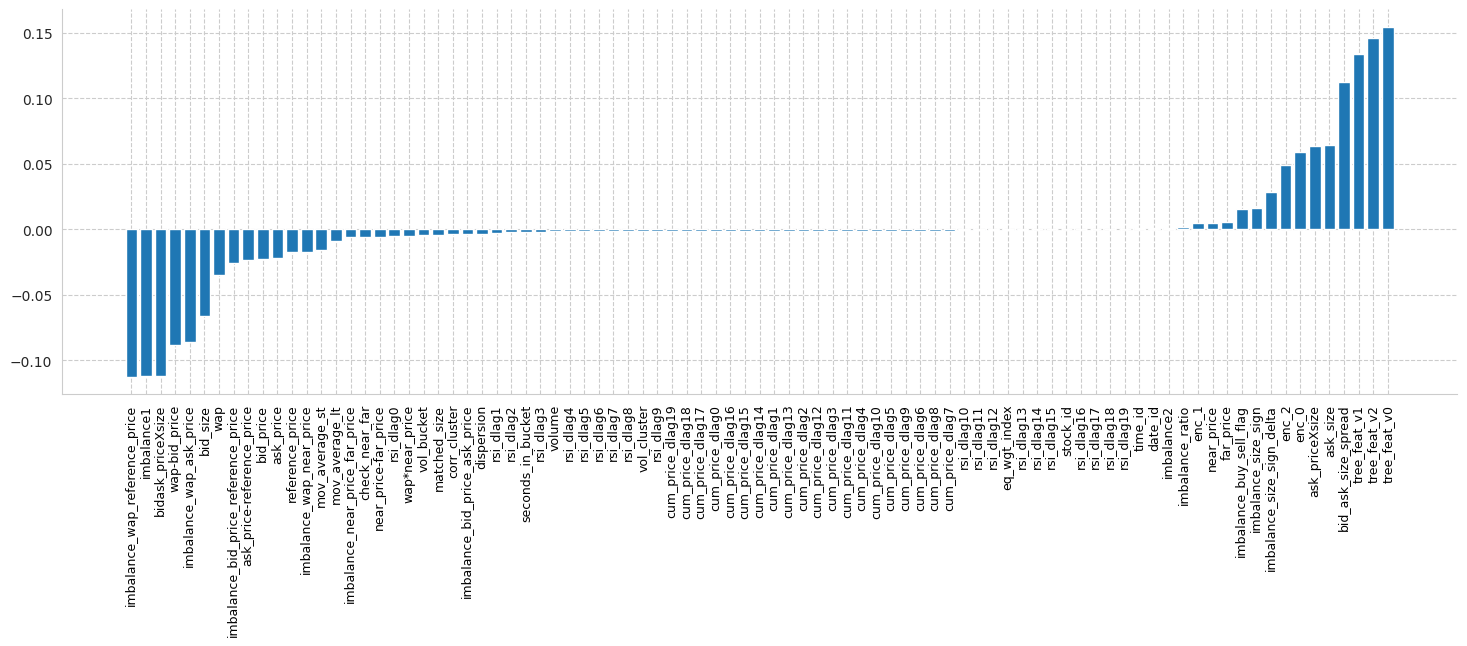

In [21]:
plt.figure(figsize=(18,5))
correlation = corr.target
plt.bar(correlation.sort_values()[:-1].index, height=correlation.sort_values()[:-1].values)
plt.tick_params(axis="x", labelsize=9, labelrotation=90, labelcolor="black")

In [22]:
gc.collect()

16039

### 2.3 Train Test Split

In [23]:
test.date_id.unique()

array([478, 479, 480])

In [24]:
train.head()

,time_id,stock_id,date_id,ask_price,ask_size,bid_ask_size_spread,bid_price,bid_size,check_near_far,dispersion,...,rsi_dlag10,rsi_dlag11,rsi_dlag12,rsi_dlag13,rsi_dlag14,rsi_dlag15,rsi_dlag16,rsi_dlag17,rsi_dlag18,rsi_dlag19
0,0,0,0,1.000026,9.047119,-1.965797,0.999812,11.012917,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1.000660,9.933342,1.851855,0.999896,8.081488,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,0,1.000298,9.851984,-0.692226,0.999403,10.544209,1.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0,3,0,1.000214,13.079526,5.327663,0.999999,7.751863,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,0,1.000016,6.075576,-3.634724,0.999394,9.710299,1.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [25]:
test_df = train[train.date_id.isin(test.date_id.unique())]
train_df = train[train.date_id<478]

In [26]:
test_df.shape,train_df.shape

((33000, 88), (5204892, 88))

In [27]:
test_df.columns

Index(['time_id', 'stock_id', 'date_id', 'ask_price', 'ask_size',
       'bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
       'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
       'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
       'near_price', 'reference_price', 'seconds_in_bucket', 'target',
       'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster', 'imbalance1',
       'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
       'bidask_priceXsize', 'near_price-far_price',
       'imbalance_near_price_far_price', 'ask_price-reference_price',
       'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
       'imbalance_wap_reference_price', 'wap*near_price', 'mov_average_lt',
       'mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
       'wap-bid_price', 'enc_0', 'enc_1', 'enc_2', 'tree_feat_v0',
       'tree_feat_v1', 'tree_feat_v2', 'cum_price_dlag0', 'cum_price_dlag

## 3.0 MODELS

### 3.1 Baseline: RidgeRegression

In [28]:
relevant_features = ['ask_price', 'ask_size','bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
                      'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
                      'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
                      'near_price', 'reference_price', 'target',
                      'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster', 'imbalance1',
                      'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
                      'bidask_priceXsize', 'near_price-far_price',
                      'imbalance_near_price_far_price', 'ask_price-reference_price',
                      'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
                      'imbalance_wap_reference_price', 'wap*near_price', 'mov_average_lt',
                      'mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
                      'wap-bid_price', 'enc_0', 'enc_1', 'enc_2', 'tree_feat_v0',
                      'tree_feat_v1', 'tree_feat_v2',"rsi_dlag0"]

test_df = test_df[relevant_features]
train_df = train_df[relevant_features]

X = train_df.drop("target",axis=1)
X_test = test_df.drop("target",axis=1)
y = train_df["target"]
y_test = test_df["target"]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5204892 entries, 0 to 5204891
Data columns (total 44 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   ask_price                            float32
 1   ask_size                             float32
 2   bid_ask_size_spread                  float32
 3   bid_price                            float32
 4   bid_size                             float32
 5   check_near_far                       float32
 6   dispersion                           float32
 7   eq_wgt_index                         float32
 8   far_price                            float32
 9   imbalance_buy_sell_flag              int32  
 10  imbalance_size_sign                  float32
 11  imbalance_size_sign_delta            float32
 12  matched_size                         float32
 13  near_price                           float32
 14  reference_price                      float32
 15  vol_bucket                      

In [29]:
X.corr_cluster.unique()

array([3, 2, 0, 4, 1], dtype=int32)

* **DATA PIPELINE**

In [30]:
cat_cols = [c for c in X.columns if X[c].dtypes=="int32"]
num_cols = [c for c in X.columns if X[c].dtypes=="float32"]

In [44]:
numeric_transformer = Pipeline(
                                steps=[("scaler", StandardScaler())]
                              )

categorical_transformer = Pipeline(
                                    steps=[
                                        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
                                        ])
preprocessor = ColumnTransformer(
                                  transformers=[
                                      ("num", numeric_transformer, num_cols),
                                      ("cat", categorical_transformer, cat_cols),
                                  ])

# Final Pipeline
ridge_reg = Pipeline(
                steps=[("preprocessor", preprocessor), ("ridge", Ridge())]
                )

In [45]:
param_grid = {
              "ridge__alpha": [0.00001,0.0001,0.001,0.01,0.1,1.0]
              }

ridge_cv = GridSearchCV(ridge_reg, cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)

In [46]:
ridge_cv.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...............ridge__alpha=1e-05;, score=-5.741 total time=  13.8s
[CV 2/5] END ...............ridge__alpha=1e-05;, score=-7.049 total time=  11.7s
[CV 3/5] END ...............ridge__alpha=1e-05;, score=-6.401 total time=  11.5s
[CV 4/5] END ...............ridge__alpha=1e-05;, score=-6.357 total time=  11.4s
[CV 5/5] END ...............ridge__alpha=1e-05;, score=-6.025 total time=  11.6s
[CV 1/5] END ..............ridge__alpha=0.0001;, score=-5.741 total time=  11.7s
[CV 2/5] END ..............ridge__alpha=0.0001;, score=-7.049 total time=  11.8s
[CV 3/5] END ..............ridge__alpha=0.0001;, score=-6.401 total time=  11.5s
[CV 4/5] END ..............ridge__alpha=0.0001;, score=-6.357 total time=  11.4s
[CV 5/5] END ..............ridge__alpha=0.0001;, score=-6.025 total time=  11.4s
[CV 1/5] END ...............ridge__alpha=0.001;, score=-5.741 total time=  11.7s
[CV 2/5] END ...............ridge__alpha=0.001;, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ask_price',
                                                                          'ask_size',
                                                                          'bid_ask_size_spread',
                                                                          'bid_price',
                                                                          'bid_size',
                                                                          'check_near_far',
                                                                          'dispersion',
                                                                          'eq_wgt_index',
                                                                          'far_price',
                                                                          'imbalance_size_sign',
                                                                          'imbalance_size_sign_delta',
                                                                          'matched_size',
                                                                          'near_price',
                                                                          '...
                                                                          'imbalance_wap_reference_price',
                                                                          'wap*near_price',
                                                                          'mov_average_lt',
                                                                          'mov_average_st', ...]),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['imbalance_buy_sell_flag',
                                                                          'vol_bucket',
                                                                          'vol_cluster',
                                                                          'corr_cluster'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                          1.0]},
             scoring='neg_mean_absolute_error', verbose=3)

In [47]:
# Old Model
ridge_cv.best_score_,ridge_cv.best_params_

(-6.314754420853434, {'ridge__alpha': 0.001})

In [35]:
# with RSI
ridge_cv.best_score_,ridge_cv.best_params_

(-6.314754420950701, {'ridge__alpha': 0.001})

In [48]:
# Old Model
ridge_cv.score(X_test,y_test)

-5.255613186909401

In [36]:
# with RSI
ridge_cv.score(X_test,y_test)

-5.25561318676693

In [37]:
current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/sklean_models")
joblib.dump(ridge_cv, "ridge_reg_v1_rsi.joblib")
os.chdir(current_directory)

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/sklean_models")
estimator = joblib.load("ridge_reg_v1_rsi.joblib")
os.chdir(current_directory)

In [38]:
estimator.score(X_test,y_test)

-5.25561318676693

In [39]:
y_hat = estimator.predict(X_test)

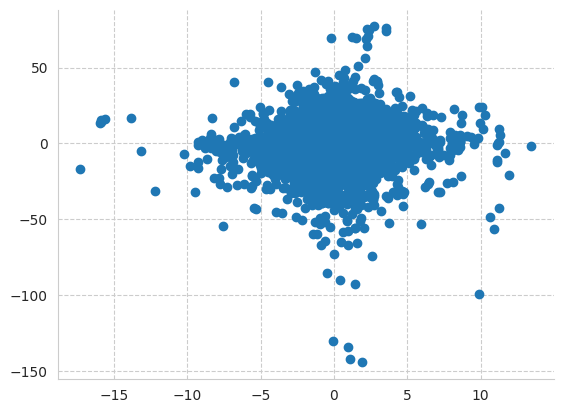

In [40]:
plt.scatter(y_hat,y_test)

In [41]:
mean_absolute_error(y_hat,y_test)

5.25561318676693

In [42]:
np.corrcoef(y_hat,y_test)

array([[1.        , 0.10227098],
       [0.10227098, 1.        ]])

### **3.2 DecitionTreeRegressor:**

In [49]:
relevant_features = ['ask_price', 'ask_size','bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
                      'dispersion', 'eq_wgt_index', 'far_price', 'imbalance_buy_sell_flag',
                      'imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
                      'near_price', 'reference_price', 'target',
                      'vol_bucket', 'wap', 'vol_cluster', 'corr_cluster', 'imbalance1',
                      'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
                      'bidask_priceXsize', 'near_price-far_price',
                      'imbalance_near_price_far_price', 'ask_price-reference_price',
                      'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price',
                      'imbalance_wap_reference_price', 'wap*near_price', 'mov_average_lt',
                      'mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
                      'wap-bid_price', 'enc_0', 'enc_1', 'enc_2', 'tree_feat_v0',
                      'tree_feat_v1', 'tree_feat_v2',"rsi_dlag0"]

test_df = test_df[relevant_features]
train_df = train_df[relevant_features]

X = train_df.drop("target",axis=1)
X_test = test_df.drop("target",axis=1)
y = train_df["target"]
y_test = test_df["target"]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5204892 entries, 0 to 5204891
Data columns (total 44 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   ask_price                            float32
 1   ask_size                             float32
 2   bid_ask_size_spread                  float32
 3   bid_price                            float32
 4   bid_size                             float32
 5   check_near_far                       float32
 6   dispersion                           float32
 7   eq_wgt_index                         float32
 8   far_price                            float32
 9   imbalance_buy_sell_flag              int32  
 10  imbalance_size_sign                  float32
 11  imbalance_size_sign_delta            float32
 12  matched_size                         float32
 13  near_price                           float32
 14  reference_price                      float32
 15  vol_bucket                      

In [50]:
X.corr_cluster.unique()

array([3, 2, 0, 4, 1], dtype=int32)

* **DATA PIPELINE**

In [51]:
cat_cols = [c for c in X.columns if X[c].dtypes=="int32"]
num_cols = [c for c in X.columns if X[c].dtypes=="float32"]

In [58]:
numeric_transformer = Pipeline(
                                steps=[("scaler", StandardScaler())]
                              )

categorical_transformer = Pipeline(
                                    steps=[
                                        ("encoder", OneHotEncoder(handle_unknown="ignore"))
                                        ])
preprocessor = ColumnTransformer(
                                  transformers=[
                                      ("num", numeric_transformer, num_cols),
                                      ("cat", categorical_transformer, cat_cols),
                                  ])

# Final Pipeline
dectree_reg = Pipeline(
                steps=[("preprocessor", preprocessor), ("treereg", DecisionTreeRegressor(criterion="absolute_error"))]
                )

In [59]:
param_grid = {
              "treereg__max_depth": [7,8,9],
              "treereg__min_samples_split": [1000,5000,7500],
              "treereg__min_samples_leaf":[1000,5000,7500]
              }

dectree_cv = GridSearchCV(dectree_reg, cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)

In [ ]:
dectree_cv.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Old Model
dectree_cv.best_score_,dectree_cv.best_params_

In [ ]:
# Old Model
dectree_cv.score(X_test,y_test)

In [ ]:
current_directory = os.getcwd()

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/sklean_models")
joblib.dump(ridge_cv, "dectree_reg_v0.joblib")
os.chdir(current_directory)

os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/sklean_models")
estimator = joblib.load("dectree_reg_v0.joblib")
os.chdir(current_directory)

In [ ]:
estimator.score(X_test,y_test)

In [ ]:
y_hat = estimator.predict(X_test)

In [ ]:
plt.scatter(y_hat,y_test)

In [ ]:
autoencoder_prellin, latent_model_prellin = model_autoencoder_mult()

# Get summary
autoencoder_prellin.summary()

In [ ]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_Regression_Output_loss",
                        factor=0.5,
                        patience=7,
                        verbose=1,
                        mode="min")

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_Regression_Output_loss",
                            patience=12,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/'

Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Regression_Output_loss",
                                                 mode='min',
                                                 restore_best_weights=True)

# Train the autoencoder with MNIST data
history_prellin = autoencoder_prellin.fit(X_t, [X_t, y_t], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                       shuffle=True, validation_data=(X_v, [X_v, y_v]))

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(10, 7))
plt.plot(history_prellin.history['loss'], label='Train')
plt.plot(history_prellin.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
os.chdir(folders_nn)
autoencoder_prellin.save(f'enc/autoencoder')
latent_model_prellin.save(f'enc/encoder')
os.chdir(current_directory)

In [ ]:
autoencoder_prellin.load_weights(checkpoint_filepath)

os.chdir(folders_nn)
autoencoder_prellin.save(f'enc/autoencoder')
latent_model_prellin.save(f'enc/encoder')
os.chdir(current_directory)

#### 5.1.1 Load Best Model and Create Features:

In [ ]:
os.chdir("/content/drive/MyDrive/kaggle/Optiver_comp_2023/Models/som_model")

with open('encoder_scaler.pickle', 'rb') as handle:
    enc_scaler = pickle.load(handle)

os.chdir(current_directory)

In [ ]:
os.chdir(folders_nn)
model = keras.models.load_model('enc/encoder')
os.chdir(current_directory)

In [ ]:
tabular_features = ['ask_price', 'ask_size','bid_ask_size_spread', 'bid_price', 'bid_size', 'check_near_far',
       'dispersion', 'eq_wgt_index', 'far_price','imbalance_size_sign', 'imbalance_size_sign_delta', 'matched_size',
       'near_price', 'reference_price', 'target', 'wap', 'imbalance1', 'imbalance2', 'imbalance_ratio', 'volume', 'ask_priceXsize',
       'bidask_priceXsize', 'near_price-far_price','imbalance_near_price_far_price', 'ask_price-reference_price',
       'imbalance_bid_price_reference_price', 'imbalance_bid_price_ask_price','imbalance_wap_reference_price',
       'wap*near_price', 'mov_average_lt','mov_average_st', 'imbalance_wap_near_price', 'imbalance_wap_ask_price',
       'wap-bid_price', 'tree_feat_v0']

tabular_features.remove("target")
train_encoding = train[tabular_features]
train_encoding = enc_scaler.transform(train_encoding)
train_encoding.shape

In [ ]:
enc_features = model.predict(train_encoding,batch_size=1024)

In [ ]:
enc_df = pd.DataFrame(data=enc_features,columns=["enc_0","enc_1","enc_2"])
#enc_df["target"]=train["target"]
enc_df.corr()

In [ ]:
train[["enc_0","enc_1","enc_2"]] = enc_df

In [ ]:
train